In [ ]:
print("all okay")

all okay


In [ ]:
from research_analyst.utils.model_loader import ModelLoader

d:\AGENT\PROJECT3\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
loader = ModelLoader()

{"timestamp": "2025-10-21T11:18:07.472412Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.473407Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.474406Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.474406Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.475404Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.478431Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-21T11:18:07.479403Z", "level": "info", "event": "All required API keys are set."}


In [ ]:
llm = loader.load_llm_model()

{"timestamp": "2025-10-21T11:18:29.045902Z", "level": "info", "event": "Loading LLM Model from provider: openai"}
{"timestamp": "2025-10-21T11:18:29.848079Z", "level": "info", "event": "Successfully loaded LLM model: gpt-4o from provider: openai"}


In [ ]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--fc327251-580f-42e1-88a3-523aaa259605-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})

In [ ]:
from typing import List,Any,TypedDict,Optional
from pydantic import BaseModel,Field

In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst")
    role: str = Field(description="Role of the analyst in the context of the project")
    affiliation: str= Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")

    @property
    def persona(self) -> str:
        return f"Expert Name {self.name}, a {self.role} affiliated with {self.affiliation}.\n Main Focus of me is {self.description}"

In [ ]:
analyst = Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [ ]:
print(analyst.persona)


Expert Name sunny savita, a genai eng affiliated with AI Research LAB.
 Main Focus of me is I am genai developer as well as mentor


In [ ]:
class Prespective(BaseModel):
    analyst:List[Analyst] = Field(description="List of analysts involved in the project")

In [ ]:
class GenerateAnalystState(TypedDict):
    topic: str
    num_analysts: int
    human_analyst_feedback: str
    analyst: List[Analyst]

In [ ]:
analyst_picking_instructions = """
You are an expert research analyst tasked with selecting a team of analysts for a project on the topic of 
{topic}.
You need to choose analysts from the available pool based on their expertise and relevance to the topic.
Consider the following feedback from a human analyst:
{human_analyst_feedback}

Determine the key {num_analysts} distinct themes required for the project. 
For each theme, select exactly **one** analyst (no more, no less). 
Your final response must contain exactly {num_analysts} analysts in total.
"""



In [ ]:
def create_analyst(state: GenerateAnalystState):
    topic = state['topic']
    num_analysts = state['num_analysts']
    human_analyst_feedback = state.get('human_analyst_feedback', '')
    prompt = analyst_picking_instructions.format(
        topic=topic,
        num_analysts=num_analysts,
        human_analyst_feedback=human_analyst_feedback
    )
    structured_llm=llm.with_structured_output(Prespective)

    content=[f"Generate the set of analysts as requested in {num_analysts}."]
    final_messages = [SystemMessage(content=prompt)] + content
    analyst=structured_llm.invoke(final_messages)

    return {"analyst": analyst.analyst}


In [ ]:
state={
    "topic": "Artificial Intelligence in Healthcare",
    "num_analysts": 7,
    "human_analyst_feedback": "Focus on recent advancements and ethical considerations."
    }

In [ ]:
create_analyst(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'analyst': [Analyst(name='Dr. Emily Zhao', role='AI Technology Specialist', affiliation='MIT Computer Science and Artificial Intelligence Laboratory', description='Dr. Zhao focuses on the development of cutting-edge AI algorithms specifically designed for healthcare applications. Her work includes machine learning models for predictive analytics in patient care.'),
  Analyst(name='Dr. Rajesh Kumar', role='Healthcare Data Scientist', affiliation='Johns Hopkins University', description='Dr. Kumar specializes in the analysis of large healthcare datasets to improve patient outcomes. His expertise includes data mining and statistical analysis to uncover trends and patterns in healthcare data.'),
  Analyst(name='Dr. Sarah Thompson', role='Ethics and Policy Analyst', affiliation='Oxford Internet Institute', description='Dr. Thompson examines the ethical implications of AI in healthcare, including issues of privacy, consent, and bias. She advocates for policies that ensure ethical AI deployme

In [ ]:
state={
    "topic": "Fiteness and Wellness Trends in 2024",
    "num_analysts": 3,
    "human_analyst_feedback": "Focus on emerging technologies and holistic approaches."
    }

In [ ]:
create_analyst(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'analyst': [Analyst(name='Dr. Emily Chen', role='Emerging Technologies Specialist', affiliation='TechWell Research Institute', description='Dr. Chen focuses on the integration of AI and wearable technology in fitness, exploring how these innovations can enhance personal health tracking and performance optimization.'),
  Analyst(name='Mr. Raj Patel', role='Holistic Wellness Analyst', affiliation='Global Wellness Council', description='Mr. Patel is dedicated to studying holistic approaches to wellness, emphasizing the importance of mental health, nutrition, and sustainable practices in achieving overall well-being.'),
  Analyst(name='Ms. Laura Gomez', role='Fitness Trends Analyst', affiliation='FitFuture Analytics', description='Ms. Gomez analyzes global fitness trends, with a particular interest in the rise of community-based fitness programs and the impact of social media on fitness culture.')]}

Analyst for our research has been created

Now we will create an Workflow for the same

In [ ]:
def human_feedback(state):
    """
    Node that should be interrupted by human to provide feedback on the selected analysts.
    """
    pass

In [ ]:
def should_continue(state):
    """
    Node that decides whether to continue the analyst selection process based on human feedback.
    """
    feedback = state.get("human_analyst_feedback", "").strip().lower()
    if feedback in ["none","","continue","skip","done"]:
        return END
    return "Analyst"

In [ ]:
from IPython.display import Image, display

First Workflow

In [ ]:
builder=StateGraph(GenerateAnalystState)
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback",human_feedback)
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst","human_feedback")
builder.add_conditional_edges("human_feedback",
                             should_continue,
                             {
                               "Analyst": "create_analyst",
                               END: END
                             }
)

In [ ]:
memory=MemorySaver()

In [ ]:
graph=builder.compile(interrupt_before=["human_feedback"],checkpointer=memory)

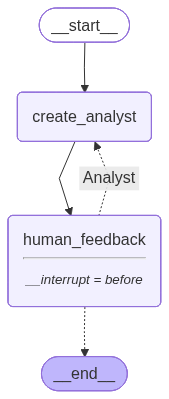

In [ ]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
state={
    "topic": "Fiteness and Wellness Trends in 2024",
    "num_analysts": 5
    }

In [ ]:
humman_feedback_input="Focus on emerging technologies and holistic approaches."

In [ ]:
thread={"configurable":{"thread_id":"3"}}

In [ ]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)    

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Analyst Name: Dr. Emily Chen
Role: Fitness Technology Specialist
Affiliation: TechFit Innovations
Description: Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.
**************************************************
Analyst Name: Michael Rodriguez
Role: Nutrition and Wellness Expert
Affiliation: Healthy Living Institute
Description: Michael is dedicated to studying the latest trends in nutrition and dietary supplements, emphasizing sustainable and holistic approaches to wellness.
**************************************************
Analyst Name: Sarah Thompson
Role: Mental Health and Wellness Advocate
Affiliation: Mindful Balance
Description: Sarah advocates for the importance of mental health in overall wellness, researching the impact of mindfulness and stress reduction techniques on physical health.
**************************************************
Analyst Name: Raj Patel
Rol

In [ ]:
stage = graph.get_state(thread)

In [ ]:
stage

StateSnapshot(values={'topic': 'Fiteness and Wellness Trends in 2024', 'num_analysts': 5, 'analyst': [Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'), Analyst(name='Ethan Williams', role='Fitness Technology Analyst', affiliation='Tech Innovations Corp', description='Specializes in wearable fitness trackers and digital health solutions. Concerned with data privacy and accuracy in fitness technology.'), Analyst(name='Chloe Davis', role='Mindfulness and Meditation Coach', affiliation='Inner Peace Center', description='Dedicated to promoting mental wellness through mindfulness practices. Focuses on stress reduction and emotional balance.'), Analyst(name='Liam Johnson', role='Exercise Physiologist', affiliation='Optimal Performance Lab', description='Designs customized exercise programs for athletes and fitness

In [ ]:
stage.next

('human_feedback',)

In [ ]:
graph.update_state(
    thread,
    {
        "human_analyst_feedback": humman_feedback_input
    }
)

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ac4af-ee85-63f1-8002-6030d55f0793'}}

In [ ]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Emily Carter
Role: Medical Advisor
Affiliation: Global Health Institute
Description: Focuses on preventative medicine and the impact of fitness on overall health outcomes.
**************************************************
Analyst Name: Jordan Lee
Role: Fitness Trainer
Affiliation: Elite Performance Gym
Description: Specializes in high-intensity training and athletic performance enhancement.
**************************************************
Analyst Name: Aisha Patel
Role: Nutritionist
Affiliation: Wellness Solutions Clinic
Description: Expert in dietary planning and the role of nutrition in fitness and wellness.
**************************************************
Analyst Name: Carlos Ramirez
Role: Technology Analyst
Affiliation: TechForward Innovations
Description: Analyzes the latest trends in fitness technology and wearable devices.
**************************************************
Analyst Name: Megan O'Connell
Role: Mental Wellness Coach
Affiliation: Mindful Livin

In [ ]:
stage1= graph.get_state(thread)

In [ ]:
stage1.next

('human_feedback',)

In [ ]:
stage1.values

{'topic': 'Fiteness and Wellness Trends in 2024',
 'num_analysts': 3,
 'human_analyst_feedback': 'Focus on emerging technologies and holistic approaches.',
 'analyst': [Analyst(name='Dr. Anya Sharma', role='Lead Wellness Consultant', affiliation='Global Wellness Institute', description='Expert in holistic wellness practices, including mindfulness, nutrition, and integrative medicine. Focuses on personalized wellness plans and the impact of lifestyle on overall health.'),
  Analyst(name='Ben Carter', role='Fitness Technology Analyst', affiliation='Tech Innovations Inc.', description='Specializes in wearable fitness trackers, smart home gym equipment, and AI-driven fitness apps. Interested in the gamification of fitness and the use of data analytics to improve workout outcomes.'),
  Analyst(name='Carlos Rodriguez', role='Nutrition Science Researcher', affiliation='Food Science University', description='Conducts research on the impact of diet on physical performance and recovery. Focuses 

In [ ]:
future_feedback=""

In [ ]:
graph.update_state(
    thread,
    {
        "human_analyst_feedback": future_feedback
    }
)

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ae6ff-58fe-669d-8002-d3fe365d9e62'}}

In [ ]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Anya Sharma
Role: Lead Wellness Consultant
Affiliation: Global Wellness Institute
Description: Expert in holistic wellness practices, including mindfulness, nutrition, and integrative medicine. Focuses on personalized wellness plans and the impact of lifestyle on overall health.
**************************************************
Analyst Name: Ben Carter
Role: Fitness Technology Analyst
Affiliation: Tech Innovations Inc.
Description: Specializes in wearable fitness trackers, smart home gym equipment, and AI-driven fitness apps. Interested in the gamification of fitness and the use of data analytics to improve workout outcomes.
**************************************************
Analyst Name: Carlos Rodriguez
Role: Nutrition Science Researcher
Affiliation: Food Science University
Description: Conducts research on the impact of diet on physical performance and recovery. Focuses on sports nutrition, personalized diets, and the role of supplements in athletic training.
****

In [ ]:
stage2= graph.get_state(thread)

In [ ]:
stage2.next

('human_feedback',)

In [ ]:
for event in graph.stream(input=None,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Emily Carter
Role: Lead Researcher
Affiliation: Global Wellness Institute
Description: Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.
**************************************************
Analyst Name: Michael Davis
Role: Fitness Consultant
Affiliation: National Academy of Sports Medicine
Description: Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.
**************************************************
Analyst Name: Sophia Rodriguez
Role: Nutritionist
Affiliation: Academy of Nutrition and Dietetics
Description: Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and performance.
*****************

In [ ]:
stage3= graph.get_state(thread)

In [ ]:
stage3.next

('human_feedback',)

In [ ]:
cfg = stage3.config

In [ ]:
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ae6ff-c623-6edd-8003-a1ffba565407'}}

In [ ]:
final_state = graph.get_state(thread)

In [ ]:
final_state.next

()

In [ ]:
final_state.values.get('analyst')

[Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 Analyst(name='Michael Rodriguez', role='Nutrition and Wellness Expert', affiliation='Healthy Living Institute', description='Michael is dedicated to studying the latest trends in nutrition and dietary supplements, emphasizing sustainable and holistic approaches to wellness.'),
 Analyst(name='Sarah Thompson', role='Mental Health and Wellness Advocate', affiliation='Mindful Balance', description='Sarah advocates for the importance of mental health in overall wellness, researching the impact of mindfulness and stress reduction techniques on physical health.'),
 Analyst(name='Raj Patel', role='Sustainable Fitness Practices Analyst', affiliation='EcoFit Solutions', description='Raj analyzes the intersection of

First Flow completed

In [ ]:
analyst1=final_state.values.get('analyst')[0]

In [ ]:
analyst1

Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.')

In [ ]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
import os
from langchain_tavily import TavilySearch
web_search = TavilySearch(api_key=os.getenv("TAVILY_API_KEY"),max_results=5)

In [ ]:
result=web_search.invoke("what is Langgraph")
context="\n\n".join([f"source={data.get('url')} \n content={data.get('content')}" for data in result.get('results')])
print(context)

source=https://www.datacamp.com/tutorial/langgraph-tutorial 
 content=LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interactions.

source=https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/ 
 content=LangGraph is an open-source framework built by LangChain that streamlines the creation and managemen

In [ ]:
result

{'query': 'what is Langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [ ]:
print(analyst1.persona)

Expert Name Ava Sharma, a Lead Nutritionist affiliated with Global Wellness Institute.
 Main Focus of me is Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.


In [ ]:
from typing import Annotated
import operator
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    topic:str
    max_num_turns:int
    turn_count:int=0
    context:Annotated[List,operator.add]
    analyst: Analyst
    interview:str
    sections:List
    answer: List



In [ ]:
question_instruction="""

you are an analyst tasked to interview an expert to learn about the topic.

You will ask a series of questions to gather insights and information from the expert.

1. Interesting : Insights that people will find surprising or non-obvious.
2. Deep Dive : In-depth analysis or exploration of complex aspects.
3. Specific: Insights that avoid generalities and include specific examples from the expert.

here is the details of Expert Analyst: {goals}

Here is your topic of focus : {topic}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""



In [ ]:
def generation_question(state: InterviewState):
    """Node to generate the questions"""
    
    analyst = state["analyst"]
    messages = state["messages"]
    topic = state["topic"]  # ✅ get topic from state

    # Generate the question prompt
    system_message_content = question_instruction.format(
        goals=analyst.persona,
        topic=topic  # include topic in goals
    )

    system_message = SystemMessage(content=system_message_content)
    question = llm.invoke([system_message] + messages)

    # Return updated messages in state
    return {"messages": [question]}


In [ ]:
interview_state = InterviewState(
    max_num_turns=2,
    context=[],
    analyst=analyst1,
    interview="",
    sections=[],   # ✅ must match the field name
    messages=[HumanMessage(content="hi do the proper search according to the expertise")],
    topic=final_state.values.get('topic'), # this has a valid value,
    answer=[]
)

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={})],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [ ]:
question_asked=generation_question(interview_state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
print(question_asked["messages"][0])

content="Hello, I'm Alex Turner, a technology trends analyst. I'm excited to learn from you today, Dr. Chen, about the fitness and wellness trends we can expect in 2024, particularly with the integration of wearable technology and AI. \n\nTo start, could you share some of the most surprising or non-obvious trends in fitness technology that you anticipate for 2024?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 246, 'total_tokens': 321, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CT4ih09io7EMLKqRMzpQlPVk6qwoh', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--584644bb-f3b8-4bb9-83f7-4a68f7bde951-0' usage_metadata={'input_tokens': 246, 'output_t

In [ ]:
final_state.values.get('topic')

'Fiteness and Wellness Trends in 2024'

In [ ]:
state

{'topic': 'Fiteness and Wellness Trends in 2024', 'num_analysts': 5}

In [ ]:
question_instruction.format(goals = analyst1.persona,topic=final_state.values.get('topic'))

'\n\nyou are an analyst tasked to interview an expert to learn about the topic.\n\nYou will ask a series of questions to gather insights and information from the expert.\n\n1. Interesting : Insights that people will find surprising or non-obvious.\n2. Deep Dive : In-depth analysis or exploration of complex aspects.\n3. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nhere is the details of Expert Analyst: Expert Name Ava Sharma, a Lead Nutritionist affiliated with Global Wellness Institute.\n Main Focus of me is Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.\n\nHere is your topic of focus : Fiteness and Wellness Trends in 2024\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete t

In [ ]:
final_state

StateSnapshot(values={'topic': 'Fiteness and Wellness Trends in 2024', 'num_analysts': 5, 'human_analyst_feedback': '', 'analyst': [Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'), Analyst(name='Ethan Williams', role='Fitness Technology Analyst', affiliation='Tech Innovations Corp', description='Specializes in wearable fitness trackers and digital health solutions. Concerned with data privacy and accuracy in fitness technology.'), Analyst(name='Chloe Davis', role='Mindfulness and Meditation Coach', affiliation='Inner Peace Center', description='Dedicated to promoting mental wellness through mindfulness practices. Focuses on stress reduction and emotional balance.'), Analyst(name='Liam Johnson', role='Exercise Physiologist', affiliation='Optimal Performance Lab', description='Designs customized exercise pro

Answering to the question generated

In [ ]:
class SearchQuery(BaseModel):
    search_query: str = Field(description="The search query to be used for web search or for wikipedia search.")

In [ ]:
search_instruction="""
You are an expert research analyst tasked with generating a precise search query 
for the conversation provided between the expert analyst and the analyst who wants to understand the
topic better.
{messages}
pay attention to the analyst's persona and goals while formulating the search query.
convert the above conversation into a concise search query that can be used to fetch 
relevant information from web search or wikipedia search.
"""

In [ ]:
def search_web(state: InterviewState):
    """Node to generate the search query"""
    
    messages = state["messages"]

    formatted_messages = "\n".join(
        f"{m.type.upper()}: {m.content}" for m in messages
    )
    

    # Generate the search query prompt
    prompt = search_instruction.format(
        messages=formatted_messages)
    

    system_message = SystemMessage(content=prompt)
    structured_llm=llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([system_message]+[HumanMessage(content="hi do the proper question formulation based on the context")])

    result=web_search.invoke(search_query.search_query)
    context="\n\n".join([f"source={data.get('url')} \n content={data.get('content')}" for data in result.get('results')])

    # Return updated state with search query
    return {"context": [context]}

In [ ]:
question_asked

{'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--1976aef5-c6d9-4c61-99c2-cf2859030342-0', usage_metadata={'input_tokens': 240, 'output_tokens': 112, 'total_tokens': 352, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={})],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [ ]:
question_asked

{'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--1976aef5-c6d9-4c61-99c2-cf2859030342-0', usage_metadata={'input_tokens': 240, 'output_tokens': 112, 'total_tokens': 352, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
interview_state["messages"]= question_asked["messages"]

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'),
 'interview': '',
 'sections': [],
 'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': '

In [ ]:
answer=search_web(interview_state)

In [ ]:
print(answer["context"][0])

source=https://aeworld.com/lifestyle/well-being/the-biggest-wellness-trends-in-2024/ 
 content=The rise of biomonitoring and wearables is redefining the landscape of health and wellness, blending cutting-edge technology with luxury lifestyle. These innovations not only reflect a growing awareness of health and wellness but also signify a demand for authenticity and effectiveness in lifestyle choices. This burgeoning trend of personalized wellness products signifies a holistic approach to health, intertwining luxury, efficacy, and self-awareness in an exquisite fusion of care and indulgence. This shift reflects a growing understanding that a balanced gut can enhance not just digestion, but also immune function, mental clarity, and skin health.Luxury brands are quick to capitalize on this trend, offering premium probiotics, gourmet gut-friendly foods, and detox retreats that focus on digestive wellness.

source=https://supplementrelief.com/consumer-wellness-trends-for-2024/?srsltid=AfmBO

The rise of biomonitoring and wearables is redefining the landscape of health and wellness, blending cutting-edge technology with luxury lifestyle. These innovations not only reflect a growing awareness of health and wellness but also signify a demand for authenticity and effectiveness in lifestyle choices. This burgeoning trend of personalized wellness products signifies a holistic approach to health, intertwining luxury, efficacy, and self-awareness in an exquisite fusion of care and indulgence. This shift reflects a growing understanding that a balanced gut can enhance not just digestion, but also immune function, mental clarity, and skin health.Luxury brands are quick to capitalize on this trend, offering premium probiotics, gourmet gut-friendly foods, and detox retreats that focus on digestive wellness.

The focus is shifting to personalized nutrition plans considering individual dietary preferences, health goals, and genetic factors.

1. Mindfulness took center stage · 2. Personalized fitness experiences soared · 3. Holistic health became a movement · 4. Nutrition education made

. Indeed, the majority of Forbes Health Advisory Board members who provided their predictions noted the popularity of protein isn’t going away anytime soon—particularly plant-based picks. | Transparent Labs Pea Protein Isolate | * USDA-Certified Organic Pea Protein Powder * Provides 28 Grams of Complete Protein Per Scoop * Simple, Healthy Way to Increase Protein Intake on a Plant-Based Diet * No Artificial Flavoring, Artificial Sweeteners, or Artificial Food Coloring | Shop Now  On Transparent Labs' Website |  | Indeed, many Forbes Health Advisory Board members pointed to sustainable practices paving the way in nutrition in 2024, and TikTok data shows #foodwaste earned 88 million U.S. views in 2023, with videos showing how you can make your food last longer and how to best utilize scraps#foodwaste.

Now, personalized vitamins and gut biome tests are just some examples of how health is being explored with these individual, tailor-made characteristics. 4.

In [ ]:
from langchain_community.document_loaders import WikipediaLoader

In [ ]:
docs= WikipediaLoader(query="Artificial Intelligence").load()

In [ ]:
print(docs[0].page_content[:10000])

Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.
High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being calle

In [ ]:
context=[f"source={doc.metadata['source']} \n content={doc.page_content}" for doc in docs]

In [ ]:
print("\n".join(context))

source=https://en.wikipedia.org/wiki/Artificial_intelligence 
 content=Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.
High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting ed

In [ ]:
def search_wiki(state: InterviewState):
    """Node to perform Wikipedia search"""
    
    messages = state["messages"]

    formatted_messages = "\n".join(
        f"{m.type.upper()}: {m.content}" for m in messages
    )
    

    # Generate the search query prompt
    prompt = search_instruction.format(
        messages=formatted_messages)
    

    system_message = SystemMessage(content=prompt)
    structured_llm=llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([system_message]+[HumanMessage(content="hi do the proper question formulation based on the context to search in wikipedia")])

    loader=WikipediaLoader(query=search_query.search_query)
    docs= loader.load()
    context="\n\n".join([f"source={doc.metadata['source']} \n content={doc.page_content}" for doc in docs])

    # Return updated state with search query
    return {"context": [context]}

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'),
 'interview': '',
 'sections': [],
 'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': '

In [ ]:
search_wiki(interview_state)

{'context': ['']}

Based on the context we need to answer the question

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'),
 'interview': '',
 'sections': [],
 'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': '

In [ ]:
answer_instructions="""
Your are an expert research analyst tasked with answering the question based on the provided context.
pay attention to the analyst's persona and goals while formulating the answer.

Topic: {topic}

Context: {context}

Question asked by the analyst will be the message list conversation. 

Pay attention tho conversation and extract the question from there.

messages: {messages}

1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation.

Ensure the answer should be relevant to the question asked by the analyst. 

Irrelevant information should be omitted STRICKLY.
"""

In [70]:
def generate_answer(state: InterviewState):
    """Node to generate the final answer based on context"""
    
    messages = state["messages"]
    context = state["context"]
    topic=state["topic"]

    formatted_messages = "\n".join(
        f"{m.type.upper()}: {m.content}" for m in messages
    )
    

    # Generate the answer prompt
    prompt = answer_instructions.format(
        context="\n".join(context),
        messages=formatted_messages,
        topic=topic
    )
    

    system_message = SystemMessage(content=prompt)
    answer = llm.invoke([system_message]+[HumanMessage(content="Answer the question based on the context provided")])

    turn_count = state.get("turn_count", 0) + 1
    # Return updated state with the final answer
    return {"answer": [answer], "turn_count": turn_count}

In [ ]:
answer


{'context': ["source=https://aeworld.com/lifestyle/well-being/the-biggest-wellness-trends-in-2024/ \n content=The rise of biomonitoring and wearables is redefining the landscape of health and wellness, blending cutting-edge technology with luxury lifestyle. These innovations not only reflect a growing awareness of health and wellness but also signify a demand for authenticity and effectiveness in lifestyle choices. This burgeoning trend of personalized wellness products signifies a holistic approach to health, intertwining luxury, efficacy, and self-awareness in an exquisite fusion of care and indulgence. This shift reflects a growing understanding that a balanced gut can enhance not just digestion, but also immune function, mental clarity, and skin health.Luxury brands are quick to capitalize on this trend, offering premium probiotics, gourmet gut-friendly foods, and detox retreats that focus on digestive wellness.\n\nsource=https://supplementrelief.com/consumer-wellness-trends-for-20

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Ava Sharma', role='Lead Nutritionist', affiliation='Global Wellness Institute', description='Expert in personalized nutrition plans and dietary trends. Focuses on the impact of diet on overall wellness and fitness.'),
 'interview': '',
 'sections': [],
 'messages': [AIMessage(content="Okay, here we go.\n\nHello Ava, thank you for taking the time to speak with me today. My name is Daniel, and I'm an analyst researching fitness and wellness trends for 2024. As a Lead Nutritionist with the Global Wellness Institute, your expertise in personalized nutrition and dietary trends is invaluable to my research.\n\nTo start, what are some of the most **interesting** shifts you're seeing in how people are approaching fitness and wellness in 2024, things that might surprise the average person?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': '

In [ ]:
interview_state["context"] = answer["context"]

In [ ]:
interview_state

{'max_num_turns': 2,
 'context': ["source=https://aeworld.com/lifestyle/well-being/the-biggest-wellness-trends-in-2024/ \n content=The rise of biomonitoring and wearables is redefining the landscape of health and wellness, blending cutting-edge technology with luxury lifestyle. These innovations not only reflect a growing awareness of health and wellness but also signify a demand for authenticity and effectiveness in lifestyle choices. This burgeoning trend of personalized wellness products signifies a holistic approach to health, intertwining luxury, efficacy, and self-awareness in an exquisite fusion of care and indulgence. This shift reflects a growing understanding that a balanced gut can enhance not just digestion, but also immune function, mental clarity, and skin health.Luxury brands are quick to capitalize on this trend, offering premium probiotics, gourmet gut-friendly foods, and detox retreats that focus on digestive wellness.\n\nsource=https://supplementrelief.com/consumer-w

In [ ]:
answer=generate_answer(interview_state)


In [ ]:
print(answer['answer'][0].content)

In 2024, some interesting shifts in fitness and wellness include:

*   The rise of biomonitoring and wearables, blending technology with luxury lifestyle, reflecting a growing awareness of health and a demand for authenticity [1].

*   A focus on personalized nutrition plans that consider individual dietary preferences, health goals, and genetic factors [2].

*   A desire for fast food, declining health, proactive health management, tracking data, and less restrictive diets [3].

*   A focus on emotional well-being and mental health [5].

*   Embracing balance and sustainability, rather than quick fixes [5].

Sources:

[1] https://aeworld.com/lifestyle/well-being/the-biggest-wellness-trends-in-2024/
[2] https://supplementrelief.com/consumer-wellness-trends-for-2024/?srsltid=AfmBOoq5UbNybSffW_xO-tHsBqR6RUns94ISKraZZygwmTeFaD42N0-x
[3] https://www.gwi.com/blog/wellness-trends
[5] https://www.fitonhealth.com/blog/wellness-trends-2024-highlights-from-fiton-healths-member-report


In [72]:
def route_message(state: InterviewState):
    """Route message between question generation, search, and answer generation based on the max turn."""
    
    max_turns = state["max_num_turns"]
    
    turn_count = state.get("turn_count", 0)

    print(f"Routing... Turn {turn_count}/{max_turns}")

    if turn_count> max_turns:
        return "save_interview"
    else:
        return "ask_question"

In [73]:
from langchain_core.messages import get_buffer_string
def save_interview(state: InterviewState):
    """Node to save the interview transcript."""
    
    messages = state["messages"]
    
    interview_transcript = get_buffer_string(messages)

    # Here, you would typically save the transcript to a database or file.
    # For this example, we'll just return it in the state.
    return {"interview": interview_transcript}

In [74]:
section_writing_instruction="""
You are an expert research analyst tasked with writing sections based on the interview transcript and the answer provided.
interview_content: {interview}
answer_content: {answer}
You will write sections based on the interview content and the answer provided.

Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
- Use bullet points for key insights and findings

Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

Make your title engaging based upon the focus area of the analyst: 
{focus}

For summary, provide a concise overview of the key insights and findings from the interview and answer.
Emphasize what is novel, interesting, or surprising about insights gathered from the interview
Do not mention the names of interviewers or experts.
Summary should be relevant to the topic discussed and not more than 1000 words.

For sources, list all the sources referenced in the answer section.
Ensure the report is well-organized, clear, and easy to read.

### Sources
[1] Link or Document name
[2] Link or Document name

Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/

Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [75]:
def write_sections(state: InterviewState):
    """Node to write sections based on the interview and answer."""
    
    interview = state["interview"]
    answer = state["answer"][0].content
    focus = state["topic"]

    # Generate the section writing prompt
    prompt = section_writing_instruction.format(
        interview=interview,
        answer=answer,
        focus=focus
    )
    

    system_message = SystemMessage(content=prompt)
    sections = llm.invoke([system_message]+[HumanMessage(content="Write the report sections based on the interview and answer provided")])

    # Return updated state with the written sections
    return {"sections": [sections]}

In [76]:
interview_state

{'max_num_turns': 2,
 'turn_count': 0,
 'context': [],
 'analyst': Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={}, id='82fdf665-f66b-41af-8fbc-ee7d525b05c9')],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [77]:
interview_state["answer"]= answer['answer']

NameError: name 'answer' is not defined

In [79]:
interview_state

{'max_num_turns': 2,
 'turn_count': 0,
 'context': [],
 'analyst': Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={}, id='82fdf665-f66b-41af-8fbc-ee7d525b05c9')],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [80]:
section=write_sections(interview_state)

IndexError: list index out of range

In [81]:
print(section['sections'][0].content)

NameError: name 'section' is not defined

Now we will automate the flow

In [82]:
interview_builder=StateGraph(InterviewState)
interview_builder.add_node("generation_question",generation_question)
interview_builder.add_node("search_web",search_web)
#interview_builder.add_node("wiki_search",search_wiki)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_sections",write_sections)
interview_builder.add_edge(START,"generation_question")
interview_builder.add_edge("generation_question","search_web")
#interview_builder.add_edge("generation_question","wiki_search")
interview_builder.add_edge("search_web","generate_answer")
#interview_builder.add_edge("wiki_search","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                                      route_message,
                                      {
                                        "ask_question": "generation_question",
                                        "save_interview": "save_interview"
                                      }
                                     )
interview_builder.add_edge("save_interview","write_sections")
interview_builder.add_edge("write_sections",END)


In [83]:
interview_graph=interview_builder.compile(checkpointer=memory).with_config(run_name="conduct_interview")

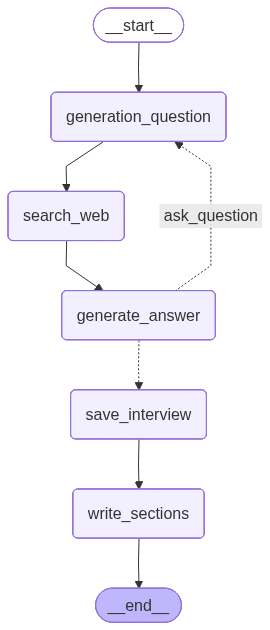

In [84]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [85]:
analyst1

Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.')

In [86]:
interview_state

{'max_num_turns': 2,
 'turn_count': 0,
 'context': [],
 'analyst': Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={}, id='82fdf665-f66b-41af-8fbc-ee7d525b05c9')],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [87]:
interview_state = InterviewState(
    max_num_turns=2,
    turn_count=0,
    context=[],
    analyst=analyst1,
    interview="",
    sections=[],   # ✅ must match the field name
    messages=[HumanMessage(content="hi do the proper search according to the expertise")],
    topic=final_state.values.get('topic'), # this has a valid value,
    answer=[]
)

In [88]:
interview_state

{'max_num_turns': 2,
 'turn_count': 0,
 'context': [],
 'analyst': Analyst(name='Dr. Emily Chen', role='Fitness Technology Specialist', affiliation='TechFit Innovations', description='Dr. Chen focuses on the integration of wearable technology and AI in fitness, exploring how these advancements can enhance personal training and health monitoring.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={})],
 'topic': 'Fiteness and Wellness Trends in 2024',
 'answer': []}

In [89]:
thread = {"configurable": {"thread_id": "8"}}

In [90]:
interview = interview_graph.invoke(interview_state, thread)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Routing... Turn 1/2


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Routing... Turn 2/2


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Routing... Turn 3/2


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [91]:
from IPython.display import Markdown

In [98]:
Markdown(interview['sections'][0].content)

## Fitness and Wellness Trends in 2024

### Summary

In 2024, the landscape of personal training is poised for transformation through significant advancements in wearable technology. These devices are evolving beyond simple fitness trackers into comprehensive health monitoring tools. The most surprising development is the integration of advanced biometric tracking and real-time data analysis, which allows for highly personalized workout suggestions that adapt dynamically as users' fitness levels change. This innovation ensures that personal training is not only more tailored but also more responsive to individual needs.

Wearable technology now provides users with detailed insights into various health metrics, including heart rate and glucose levels, offering a holistic view of their fitness and health status. This capability empowers personal trainers to design customized exercise routines and deliver real-time feedback, enhancing the coaching experience while preserving the essential human touch. The fusion of technology and personal training is set to redefine how individuals approach fitness, making it more efficient and personalized than ever before.

### Sources

[1] forbes.com  
[2] mckinsey.com  
[3] theclubathammockbeach.com  
[4] ignite.abcfitness.com  
[5] atpconnect.org  

In [99]:
interview

{'messages': [HumanMessage(content='hi do the proper search according to the expertise', additional_kwargs={}, response_metadata={}, id='8dd09887-cd4f-4768-b924-f74446066d36'),
  AIMessage(content="Hello, I'm Alex Thompson, a journalist with a keen interest in the intersection of technology and wellness. I'm thrilled to have the opportunity to speak with you, Dr. Chen, about the fitness and wellness trends we can expect to see in 2024. To start, could you share some insights into the most surprising advancements in wearable technology that are set to impact personal training next year?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 246, 'total_tokens': 323, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'f

reading the content from url

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from langchain.schema import HumanMessage, SystemMessage

# --- Step 1: Search for topic ---
search_results =web_search.invoke("what is Langgraph")

# --- Step 2: Fetch readable text from URLs ---
def fetch_page_text(url):
    try:
        res = requests.get(url, timeout=10)
        soup = BeautifulSoup(res.text, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except Exception:
        return ""

web_context = ""
for r in search_results["results"]:
    page_text = fetch_page_text(r["url"])
    if page_text:
        web_context += f"\n\n[Source: {r['title']}] {page_text[:4000]}"  # limit length to avoid token overflow



system_prompt = """
You are a knowledgeable AI assistant.
Use the given web context to answer the user's question factually.
If unsure, say you don't know.
"""

question = "what is langgraph."

messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=f"Context:\n{web_context}\n\nQuestion: {question}")
]

response = llm.invoke(messages)
print("\n🔍 ANSWER:\n", response.content)



🔍 ANSWER:
 LangGraph is an open-source framework created by LangChain that helps developers build, deploy, and manage AI agent workflows. It combines large language models (LLMs) with graph-based architectures, allowing developers to map, organize, and optimize how AI agents interact and make decisions. LangGraph provides tools and libraries to create, run, and optimize LLMs in a scalable and efficient way. It is designed for developers who want to build adaptable AI agents and offers features like customizable paths, state management, support for loops, human-in-the-loop integration, and debugging tools.



🔍 ANSWER:
 LangGraph is an open-source framework created by LangChain that helps developers build, deploy, and manage AI agent workflows. It combines large language models (LLMs) with graph-based architectures, allowing developers to map, organize, and optimize how AI agents interact and make decisions. LangGraph provides tools and libraries to create, run, and optimize LLMs in a scalable and efficient way. It is designed for developers who want to build adaptable AI agents and offers features like customizable paths, state management, support for loops, human-in-the-loop integration, and debugging tools.

In [ ]:
web_context = ""
for r in search_results["results"]:
    print(f"Fetching content from: {r['url']}")
    page_text = fetch_page_text(r["url"])
    print(page_text)
    if page_text:
        web_context += f"\n\n[Source: {r['title']}] {page_text[:4000]}"
        print(web_context)
    break

Fetching content from: https://www.datacamp.com/tutorial/langgraph-tutorial



In [ ]:
web_context

''

In [ ]:
r

{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
 'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
 'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interactions.',
 'score': 0.94225764,
 'raw_content': None}

In [ ]:
len(fetch_page_text("https://www.ibm.com/think/topics/langgraph'"))

16517